In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import cv2
import os
# base_dir = os.path.join('.', 'data', 'severstal-steel-defect-detection')
base_dir = os.path.join('D:\\', 'Datasets', 'severstal-steel-defect-detection')

# Read csv

In [2]:
train = pd.read_csv(os.path.join(base_dir, 'train.csv'))
train = train[ train['EncodedPixels'].notnull() ]
print('Train Shape', train.shape )
train.head()

Train Shape (7095, 2)


,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
18,0007a71bf.jpg_3,18661 28 18863 82 19091 110 19347 110 19603 11...
20,000a4bcdd.jpg_1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
27,000f6bf48.jpg_4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
30,0014fce06.jpg_3,229501 11 229741 33 229981 55 230221 77 230468...


Function to transform EncodedPixels to a mask

In [3]:
def rle2mask(rle, imgshape):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height,width), k=1 ) )

Data exploration

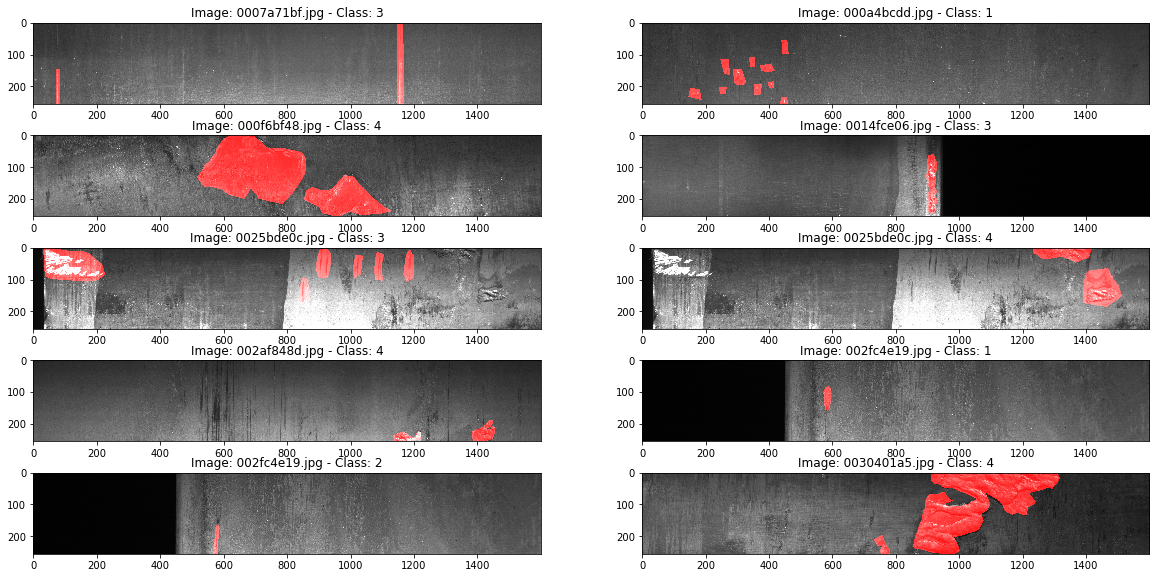

In [4]:
fig=plt.figure(figsize=(20, 10))
columns = 2
rows = 5
for i in range(1, 10+1):
    fn, dclass = train['ImageId_ClassId'].iloc[i].split('_')
    fig.add_subplot(rows, columns, i, title = 'Image: ' + fn + ' - Class: ' + dclass)
    
    
    img = cv2.imread( os.path.join(base_dir, 'train_images', fn))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = rle2mask( train['EncodedPixels'].iloc[i], img.shape  )
    img[mask==1,0] = 255
    
    plt.imshow(img)
plt.show()

# Train-Cv split


In [8]:
#reference 
columns =['class1','class2','class3','class4']

mtr_df, mval_df = train_test_split(mc, random_state=42, test_size=0.1825)
print('train_data shape:',mtr_df.shape,'val_data:',mval_df.shape)

datagen=ImageDataGenerator(rescale=1./255.,
                           shear_range=0.1,
                           zoom_range=0.1,
                           brightness_range=[0.6,1.0],
                           rotation_range=60,
                           horizontal_flip=True,
                           vertical_flip=True
                           )

train_gen=datagen.flow_from_dataframe(dataframe=mtr_df,
                                      directory=dir1+"./train_images",
                                      x_col="imageid",
                                      y_col=columns,
                                      batch_size=16,
                                      seed=42,
                                      shuffle=False,
                                      class_mode="other",
                                      target_size=(299,299))

val_gen=datagen.flow_from_dataframe(dataframe=mval_df,
                                    directory=dir1+"./train_images",
                                    x_col="imageid",
                                    y_col=columns,
                                    batch_size=16,
                                    seed=42,
                                    shuffle=False,
                                    class_mode="other",
                                    target_size=(299,299))

NameError: name 'mc' is not defined